In [0]:
## Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl

# **Dataset Information**

The dataset used in this project was acquired from UCI machine learning repository. The dataset is a record of 30,000 customers and their credit card payment information over six months (April to September). The dataset contains 30,000 rows excluding the column headers and 24 columns. All currency is in $NT. The data contains no missing value.

# **Columns**
**LIMIT_BAL** - renamed CREDIT LIMIT(NT$) for the purpose of this analysis. It is the amount given as credit to the customer.it includes both the individual consumer credit and his/her family (supplementary) credit. 

**SEX** - renamed GENDER for the purpose of this analysis. It represents the gender of the credit card holder. The column contains numerical values (1 = male, 2 = female).

**EDUCATION** - The column represents the education level of the credit card holder. The column contains numerical values (1 = graduate school, 2 = university, 3 = high school, 4 = others). 

**MARITAL STATUS** - The column represents the marital status of the credit card holder. The column contains numerical values (1 = married, 2 = single, 3 = others).

**AGE** - The column represents the age of the credit card holder. The column contains numerical values

**REPAYMENT STATUS** - recorded over six columns, with each representing a month (from April to September 2005). it states the history of past payment. 

PAY_0 = the repayment status in September, 2005; PAY_2= the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. 

Measurement Scale


---


The measurement scale for the repayment status is: 
-2 = no consumption,
-1 = pay duly,
0  = Use of revolving credit,
 1 = payment delay for one month,
 2 = payment delay for two months; . . .; 
 8 = payment delay for eight months,
 9 = payment delay for nine months and above. 

**BILL STATEMENT** -  - recorded over six columns with each representing a month (from April to September 2005). it states the history of the monthly bill amount in NT($). 

BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 
                          
**AMOUNT OF PREVIOUS PAYMENT** - recorded over six columns with each representing a month (from April to September 2005). it states the history of the amount paid by each customer in NT($).  

PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.         

# **Purpose**

The Purpose of this analysis is to use machine learning and predictive algorithm to determin whether given certain characteristics a customer will be more likely to default on their credit card payment in the next month. Part 1 of the project will contain some descriptive analysis. This is done to provide indept understanding and to see trends based on historical data that could set a foundation for Part 2 ( predictive analysis). In part 2, logistic regression method and Decision tree method will both be used for the machine learning for our predictive model. Next a confusion matrix will be used on both regression type, and an ROC (receiver operating characteristic) curve will be created. Finally, part 3 will contain prescriptive analysis. all prescription would be suggested based on the results from part 1 and 2.

    Note: For the prescriptive analysis a User Interface will be created that would allow users to input answers to questions from the dataset. the predictive algorithm would then suggest if a credit card should be granted to the customer. 
    This dataset does not contain credit score of the customer. The credit score of the customer is a great indicator of their credit worthiness, therefore we will only rely on the information provided in the dataset.





# Cleaning and dataset Transformation



In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
# this cell imports my dataset 
import io
df = pd.read_excel(io.BytesIO(uploaded['Creditcard.xlsx']), skiprows=1)
#Dataset is now stored in a Pandas Dataframe
df

NameError: ignored

In [0]:
# This cell deletes the "ID" column. 
df.drop(['ID'], inplace = True, axis=1)

df 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [0]:
# Rename sex and limit_bal columns
df.rename(columns={"SEX":"GENDER", "LIMIT_BAL":"CREDIT LIMIT(NT$)"}, inplace=True)

In [0]:
#this cell checks my dataset for any null values
df.isnull().sum() / df.shape[0]   

CREDIT LIMIT(NT$)             0.0
GENDER                        0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
Late Payments                 0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

In [0]:
#this cell double checks my dataset for any null values. Also gives general info about my df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
CREDIT LIMIT(NT$)             30000 non-null int64
GENDER                        30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
Late Payments                 30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [0]:
# Custom function to decode my daaset, specifically pay_0 to pay_6 ----- See markdown cell for column header meaning

def decoder(value):
    if value > 0 :
        return 1
    else :
        return 0

In [0]:
#this cell applies my custom function to my dataset (pay_0 to Pay_6)
# then it creates a transformed column that tells you how many late payments the customer has made
late_payments = df.loc[:,   'PAY_0':'PAY_6'].applymap(decoder).sum(axis=1)
df.insert(11,'Late Payments' ,late_payments )
df

In [0]:
df['GENDER'].unique() # Unique values in the sex column

array([2, 1])

In [0]:
df['EDUCATION'].unique() # Unique values in the sex column

array([2, 1, 3, 4])

In [0]:
# 4,6, and 0 all represents other. 
# Hence, replace all three (5,6,0) with 4
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])


In [0]:
df['MARRIAGE'].unique() # Unique values in the marriage column

array([1, 2, 3, 0])

In [0]:
# 3 and 0 represent other. 
# Hence, replace 0 with 3 for other
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

# PART 1
DESCIPTIVE ANALYSIS

In [0]:
# Lets begin by applying the describe method to our dataframe
# list of columns to include 
df[['CREDIT LIMIT(NT$)', 'AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()


,CREDIT LIMIT(NT$),AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


**Age**

The cell above tells us that:
*   The average age of the credit card holders is 35.5.

*   The youngest credit card holder is 21 years old and the oldest is 79 years old


*   25 percent of the customers are below 28 years old, and 25% are above 41 years old
*   half the customer are above 34 years old


**Credit Limit**
 



*   The mean Credit Limit is 167,484.32 NT$




*   The highest credit limit issued is 1,000,000 NT$

*   The Lowest credit limit issued is 10,000 NT$





In [0]:
# What is the relationship between gender and credit limit?
# which gender is more likely to have a higher limit on thier credit card?
Limit_by_gender = df.groupby('GENDER')['CREDIT LIMIT(NT$)'].mean()
Limit_by_gender

GENDER
1    163519.825034
2    170086.462014
Name: CREDIT LIMIT(NT$), dtype: float64

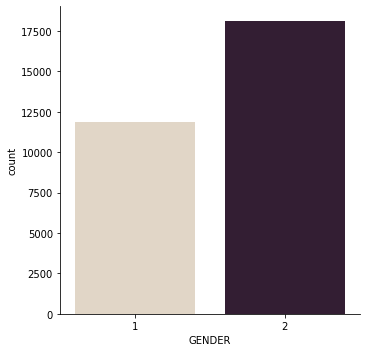

In [0]:
# barplot, count vs gender
sns.catplot(x="GENDER", kind="count", palette="ch:.25", data=df);

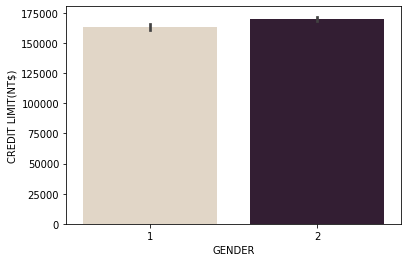

In [0]:
# barplot, eduction vs credit limit
sns.barplot(x="GENDER", y = "CREDIT LIMIT(NT$)", palette="ch:.25", data=df);
# from the plot above, we see that there are more female credit card holders than male. 
# This might account for the slight variation in the mean

1 - male, 2 - female


Gender = female; have a mean Limit higher than their male counterpart.

In [0]:
#Are people with higher education more likely to recieve higher limit on thier credit cards?
Limit_by_edu = df.groupby('EDUCATION')['CREDIT LIMIT(NT$)'].mean().sort_values(ascending = False)
Limit_by_edu 

EDUCATION
1    212956.069910
4    181316.239316
2    147062.437634
3    126550.270490
Name: CREDIT LIMIT(NT$), dtype: float64

1 = graduate school, 2 = university, 3 = high school, 4 = others

There seems to be a correlation between the limit of a customers credit card to the degree of their eduction. 

    Note: others is a combination of everything else not included in 1, 2, or 3. Therefore it sits higher on the ranking.

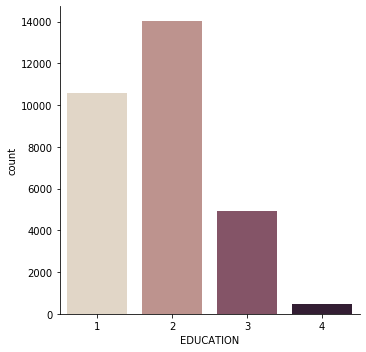

In [0]:
# barplot, count vs education
sns.catplot(x="EDUCATION", kind="count", palette="ch:.25", data=df);

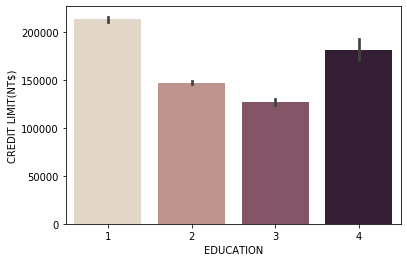

In [0]:
# barplot, eduction vs credit limit
sns.barplot(x="EDUCATION", y = "CREDIT LIMIT(NT$)", palette="ch:.25", data=df);

In [0]:
df.AGE.plot.box()
#has outliers

NameError: ignored